In [8]:
import pandas as pd
import os

df_usa = pd.read_csv('data/distilbert-usa.csv', low_memory=False)
df_usa

Tweet ID         Username  \
0       954865820156547072     JackPolakoff   
1       954865477389570049     JackPolakoff   
2       954865148212207617      sophixklein   
3       954865125315481600  environmentalhe   
4       954096307341115392               UN   
...                    ...              ...   
87714  1339349632095236102    ClimateJobsNY   
87715  1339349438712733698    SpencerForDel   
87716  1339348947157061636  MaxDavidBouchet   
87717  1339348919302688769         DrRamBio   
87718  1339348918098948096         DrRamBio   

                                                 Content  \
0      DANGER!\n#StableGenius at work\n  #ImpeachTrum...   
1      What could possibly go wrong giving one party ...   
2      @sameverlark_ @ToddDracula probs right; honest...   
3      This, 100%. Prevention is the best protection ...   
4      Disasters push 24M people into poverty every y...   
...                                                  ...   
87714  President-elect Joe Biden's naming of Gina McC...   
87715  Take the virus and climate change seriously\n\...   
87716  👀 \nTerrific visualization showing why we need...   
87717  I’ll also be including the episode of @OurWarm...   
87718  I just finished working these two @crankyuncle...   

                      Created At       User Location Filtered Location  \
0      2018-01-20 23:58:46+00:00       New York City          New York   
1      2018-01-20 23:57:25+00:00       New York City          New York   
2      2018-01-20 23:56:06+00:00  West Virginia, USA          Virginia   
3      2018-01-20 23:56:01+00:00   Thousand Oaks, CA        California   
4      2018-01-18 21:01:00+00:00        New York, NY          New York   
...                          ...                 ...               ...   
87714  2020-12-16 23:20:10+00:00                  NY          New York   
87715  2020-12-16 23:19:24+00:00  Fredericksburg, VA          Virginia   
87716  2020-12-16 23:17:27+00:00      Washington, DC     Washington DC   
87717  2020-12-16 23:17:20+00:00        Brooklyn, NY          New York   
87718  2020-12-16 23:17:20+00:00        Brooklyn, NY          New York   

         Label  Confidence  SentimentScore  \
0      LABEL_1    0.770995        1.213938   
1      LABEL_1    0.882707        2.018322   
2      LABEL_1    0.970610        3.497270   
3      LABEL_1    0.994816        5.257029   
4      LABEL_1    0.991497        4.758805   
...        ...         ...             ...   
87714  LABEL_1    0.993720        5.064069   
87715  LABEL_1    0.978434        3.814821   
87716  LABEL_1    0.995868        5.484872   
87717  LABEL_1    0.992985        4.952626   
87718  LABEL_1    0.985054        4.188285   

                                           Logits  
0      [-0.42340710759162903, 0.7905306816101074]  
1       [-0.8597121238708496, 1.1586099863052368]  
2         [-1.611891508102417, 1.885378122329712]  
3         [-2.465799570083618, 2.791228771209717]  
4       [-2.2687225341796875, 2.4900829792022705]  
...                                           ...  
87714    [-2.4225831031799316, 2.641486167907715]  
87715    [-1.8023737668991089, 2.012446880340576]  
87716    [-2.594165802001953, 2.8907065391540527]  
87717    [-2.3156869411468506, 2.636939287185669]  
87718    [-2.021662950515747, 2.1666221618652344]  

[87719 rows x 10 columns]

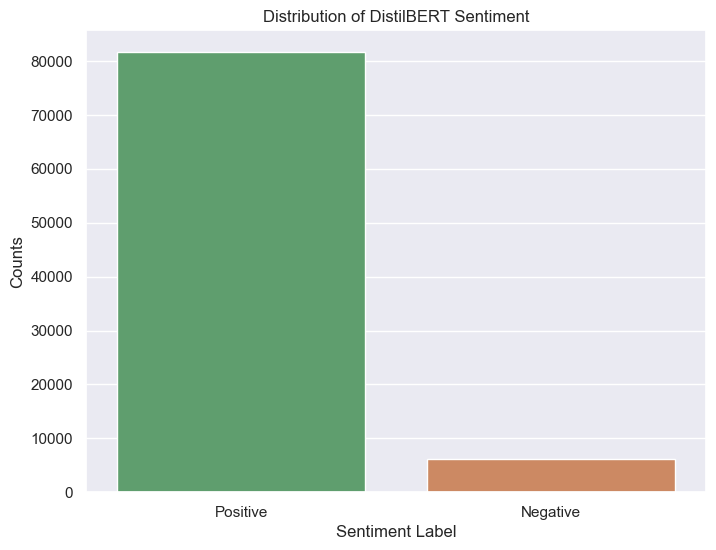

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

# color mappings
palette = sns.color_palette("deep", 3)
color_mapping = {"LABEL_1": palette[2], 
                 "LABEL_0": palette[1]}

ax = sns.countplot(x="Label", data=df_usa, order=['LABEL_1', 'LABEL_0'], palette=color_mapping)
ax.set_xticklabels(['Positive', 'Negative'])

plt.title('Distribution of DistilBERT Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Counts')
plt.show()

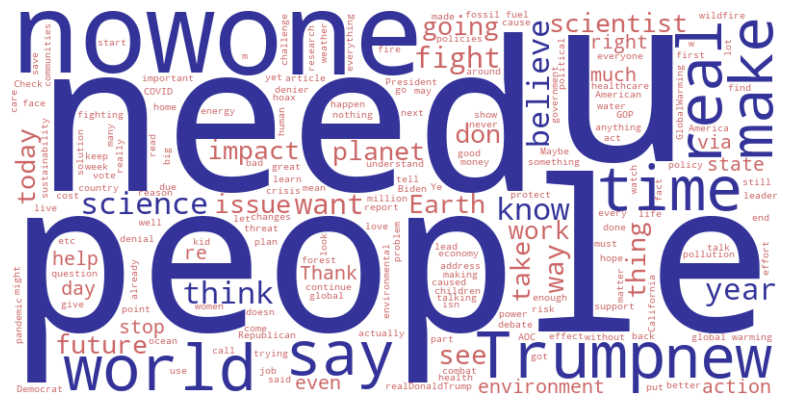

In [87]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
import re

positive_tweets = df_usa[df_usa['Label'] == 'LABEL_1']['Content']
additional_stopwords = {'https', 'co', 't', 'amp', 'will', 's', 'climate', 'change', 'climatechange', 'de', 'le'}  # Example, add more if needed

stopwords = set(STOPWORDS).union(additional_stopwords)

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if font_size > 30:  
        # blue in different shades
        return "hsl(240, 50%%, %d%%)" % np.interp(font_size, [10, 30], [60, 40])
    else:
        # red in different shades
        return "hsl(0, 50%%, %d%%)" % np.interp(font_size, [30, 60], [60, 40])


combined_text = ' '.join(str(tweet) for tweet in positive_tweets)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, color_func=color_func).generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

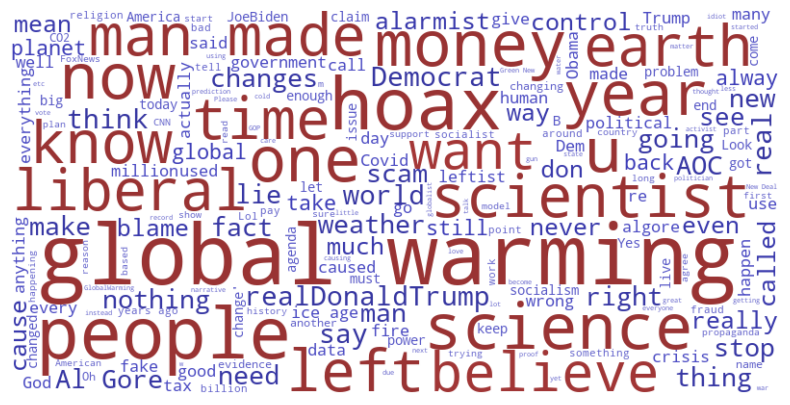

In [89]:
negative_tweets = df_usa[df_usa['Label'] == 'LABEL_0']['Content']

stopwords = set(STOPWORDS).union(additional_stopwords)

def color_func_n(word, font_size, position, orientation, random_state=None, **kwargs):
    if font_size > 30:  
        # red in different shades
        return "hsl(0, 50%%, %d%%)" % np.interp(font_size, [30, 60], [60, 40])
    else:
        # blue in different shades
        return "hsl(240, 50%%, %d%%)" % np.interp(font_size, [10, 30], [60, 40])
        
    
combined_text = ' '.join(str(tweet) for tweet in negative_tweets)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, color_func=color_func_n).generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

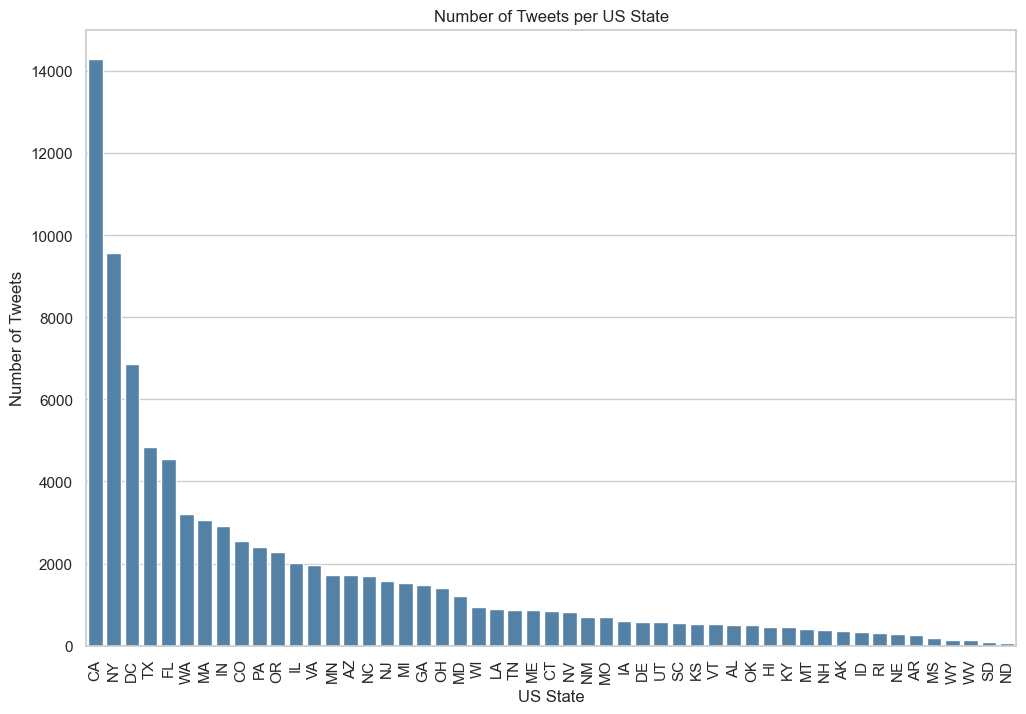

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington DC': 'DC', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# map full state names to abbreviations
df_usa['State'] = df_usa['Filtered Location'].map(state_abbreviations)
state_counts = df_usa['State'].value_counts()

# plot number of tweets per state
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.index, y=state_counts.values, color='steelblue')
plt.title('Number of Tweets per US State')
plt.xlabel('US State')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.show()

In [66]:
import plotly.express as px

state_sentiment = df_usa.groupby('State')['SentimentScore'].mean().reset_index()
state_sentiment.columns = ['State', 'Average Sentiment']

fig = px.choropleth(state_sentiment, 
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Average Sentiment',
                    color_continuous_scale='viridis', 
                    range_color=(2, 4))

fig.update_layout(title_text='Average Sentiment per US State')
fig.show()

In [68]:
# plotting variation in sentiment by state(recommended by Daniel)
variation = df_usa.groupby('State')['SentimentScore'].std().reset_index()
variation.columns = ['State', 'Sentiment Variation']

fig = px.bar(variation, x='State', y='Sentiment Variation',
             title='Total Sentiment Variation by State',
             labels={'Sentiment Variation': 'Total Sentiment Variation'},
             color_discrete_sequence=['steelblue'],
             range_y=[1.4, 2.4])

fig.update_xaxes(tickangle=-45)
fig.show()

In [42]:
# from langdetect import detect

# df_eu = pd.read_csv('data/distilbert-eu.csv', low_memory=False)

# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return "unknown"

# df_eu['Detected_Language'] = df_eu['Content'].apply(detect_language)
# # only keep tweets in english
# filtered_df_eu = df_eu[df_eu['Detected_Language'] == 'en']
# filtered_df_eu.drop(columns=['Detected_Language'], inplace=True)

# filtered_df_eu.to_csv('data/distilbert-eu-clean.csv', index=False)
df_eu = pd.read_csv('data/distilbert-eu.csv', low_memory=False)
df_eu.head()

Tweet ID         Username  \
0  954865989736378368  annemariayritys   
1  954865193451966465  annemariayritys   
2  954864712864350208      MaraVanElls   
3  954864150043381760    ferrari_carla   
4  954864077863641088    The_New_View_   

                                             Content  \
0  "Trees are sanctuaries. Whoever knows how to l...   
1  "Wilderness is not a luxury but a necessity of...   
2  Marchers chanting "End Trump, not DACA" and "C...   
3  What kind of emoji do you need to talk about c...   
4  Hey everyone, here's part two of our interview...   

                  Created At       User Location Filtered Location    Label  \
0  2018-01-20 23:59:27+00:00    Tampere, Finland           Finland  LABEL_1   
1  2018-01-20 23:56:17+00:00    Tampere, Finland           Finland  LABEL_1   
2  2018-01-20 23:54:22+00:00     Munich, Bavaria           Germany  LABEL_1   
3  2018-01-20 23:52:08+00:00   Milano, Lombardia             Italy  LABEL_1   
4  2018-01-20 23:51:51+00:00  Waterford, Ireland           Ireland  LABEL_1   

   Confidence  SentimentScore                                     Logits  \
0    0.988564        4.459497   [-2.0657334327697754, 2.393764019012451]   
1    0.936816        2.696430  [-1.1884112358093262, 1.5080188512802124]   
2    0.961353        3.213872  [-1.4217735528945923, 1.7920981645584106]   
3    0.987714        4.386932  [-2.0990960597991943, 2.2878363132476807]   
4    0.991323        4.738359  [-2.2495462894439697, 2.4888129234313965]   

  Month_Year  
0    01/2018  
1    01/2018  
2    01/2018  
3    01/2018  
4    01/2018

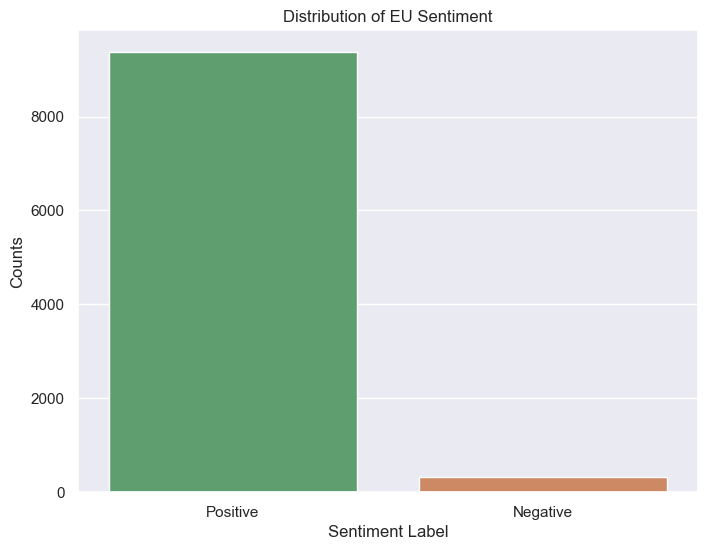

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

palette = sns.color_palette("deep", 3)
color_mapping = {"LABEL_1": palette[2], 
                 "LABEL_0": palette[1]}

ax = sns.countplot(x="Label", data=df_eu, order=['LABEL_1', 'LABEL_0'], palette=color_mapping)
ax.set_xticklabels(['Positive', 'Negative'])

plt.title('Distribution of EU Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Counts')
plt.show()

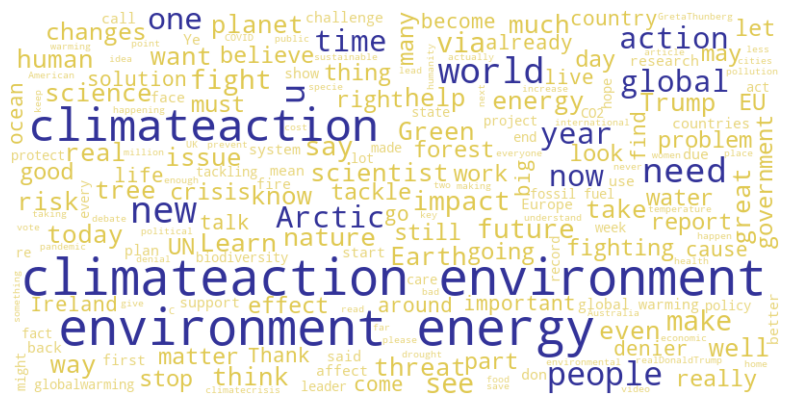

In [105]:
positive_tweets_eu = df_eu[df_eu['Label'] == 'LABEL_1']['Content']

stopwords = set(STOPWORDS).union(additional_stopwords)

def remove_urls(text):
    return re.sub(r'http[s]?://\S+', '', text)

def color_eu(word, font_size, position, orientation, random_state=None, **kwargs):
    if font_size > 30:  
        # blue
        return "hsl(240, 50%%, %d%%)" % np.interp(font_size, [10, 30], [60, 40])
    else:
        # yellow
        return "hsl(50, 70%%, %d%%)" % np.interp(font_size, [30, 20], [70, 60])

cleaned_tweets = [remove_urls(tweet) for tweet in positive_tweets_eu]
combined_text = ' '.join(cleaned_tweets)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, color_func=color_eu).generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

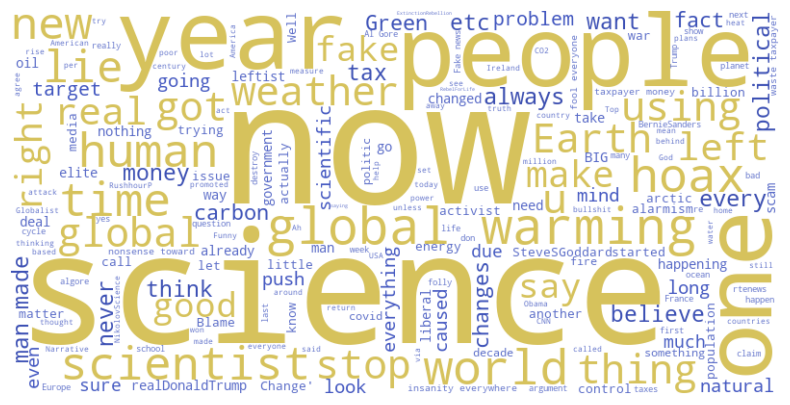

In [111]:
negative_tweets_eu = df_eu[df_eu['Label'] == 'LABEL_0']['Content']

def color_eu_n(word, font_size, position, orientation, random_state=None, **kwargs):
    if font_size > 30:
        # yellow
        return "hsl(50, 60%%, %d%%)" % np.interp(font_size, [30, 20], [70, 60])
    else:
        # blue
        return "hsl(230, 50%%, %d%%)" % np.interp(font_size, [10, 30], [60, 40])
    
stopwords = set(STOPWORDS).union(additional_stopwords)
cleaned_tweets_n = [remove_urls(tweet) for tweet in negative_tweets_eu]
combined_text_n = ' '.join(cleaned_tweets_n)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, color_func=color_eu_n).generate(combined_text_n)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
country_code_mapping = {
    "Austria": "AUT",
    "Belgium": "BEL",
    "Bulgaria": "BGR",
    "Croatia": "HRV",
    "Cyprus": "CYP",
    "Czech Republic": "CZE",
    "Denmark": "DNK",
    "Estonia": "EST",
    "Finland": "FIN",
    "France": "FRA",
    "Germany": "DEU",
    "Greece": "GRC",
    "Hungary": "HUN",
    "Ireland": "IRL",
    "Italy": "ITA",
    "Latvia": "LVA",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Malta": "MLT",
    "Netherlands": "NLD",
    "Poland": "POL",
    "Portugal": "PRT",
    "Romania": "ROU",
    "Slovakia": "SVK",
    "Slovenia": "SVN",
    "Spain": "ESP",
    "Sweden": "SWE"
}

df_eu['ISO3'] = df_eu['Filtered Location'].map(country_code_mapping)
eu_sentiment = df_eu.groupby('ISO3')['SentimentScore'].mean().reset_index()
eu_sentiment.columns = ['ISO3', 'Average Sentiment']

# eu_sentiment.head(50)
fig = px.choropleth(eu_sentiment, 
                    locations='ISO3', 
                    scope="europe",
                    color='Average Sentiment',
                    color_continuous_scale='viridis', 
                    range_color=(1, 5))

fig.update_layout(title_text='Average Sentiment per EU Country')
fig.show()

In [78]:
# plotting variation in sentiment by country
variation = df_eu.groupby('Filtered Location')['SentimentScore'].std().reset_index()
variation.columns = ['Filtered Location', 'Sentiment Variation']

# variation.max()

fig = px.bar(variation, x='Filtered Location', y='Sentiment Variation',
             title='Total Sentiment Variation by Country',
             labels={'Sentiment Variation': 'Total Sentiment Variation'},
             color_discrete_sequence=['steelblue'],
             range_y=[0.8, 2.4])

fig.update_xaxes(tickangle=-45)
fig.show()